# Read Data

In [7]:
import numpy as np
import pandas as pd

In [16]:
df = pd.read_csv('Data/Credit Card Customer Data.csv',sep=';',engine='python')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


Jumlah Baris dan Kolom

In [17]:
df.shape

(660, 7)

Menampilkan infomasi dari data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


# Data Cleaning

Menghitung total baris yang terduplikat

In [19]:
df.duplicated().sum()

0

Menghitung data bernilai null(missing value)

In [20]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

Menghapus kolom

In [21]:
drops = ['Sl_No','Customer Key']

df.drop(columns=drops, inplace=True)

Menangani nilai-nilai yang hilang

In [85]:
df.dropna(inplace=True)

Menampilkan beberapa baris teratas dari data frame

In [22]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


# EDA 

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

Membuat data dalam bentuk histogram

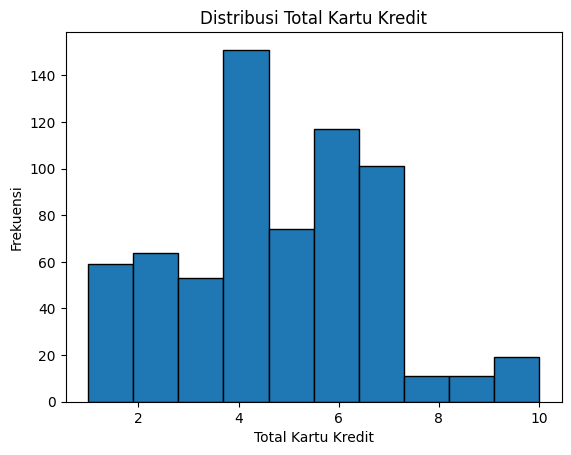

In [24]:
plt.hist(df['Total_Credit_Cards'], bins=10, edgecolor='black')
plt.xlabel('Total Kartu Kredit')
plt.ylabel('Frekuensi')
plt.title('Distribusi Total Kartu Kredit')
plt.show()

Melihat perbandingan nilai-nilai antara 2 kolom

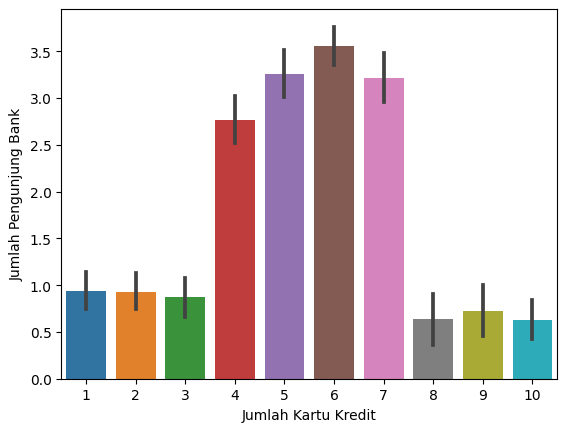

In [304]:
sns.barplot(x=df['Total_Credit_Cards'], y=df['Total_visits_bank'])
plt.xlabel('Jumlah Kartu Kredit')
plt.ylabel('Jumlah Pengunjung Bank')
plt.show()

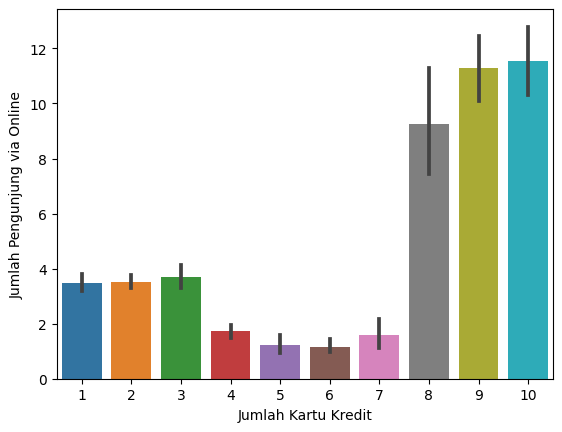

In [306]:
sns.barplot(x=df['Total_Credit_Cards'], y=df['Total_visits_online'])
plt.xlabel('Jumlah Kartu Kredit')
plt.ylabel('Jumlah Pengunjung via Online')
plt.show()

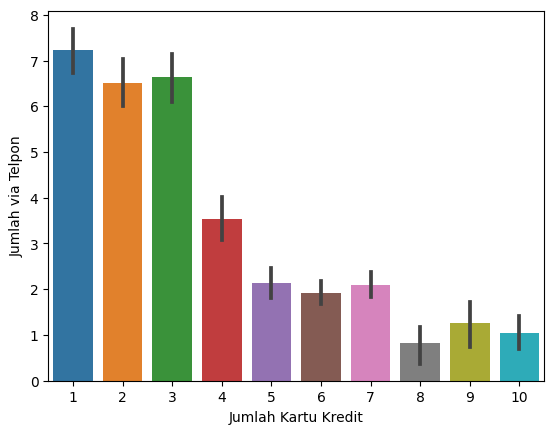

In [307]:
sns.barplot(x=df['Total_Credit_Cards'], y=df['Total_calls_made'])
plt.xlabel('Jumlah Kartu Kredit')
plt.ylabel('Jumlah via Telpon')
plt.show()

Melihat distribusi rata-rata limit kartu kredit

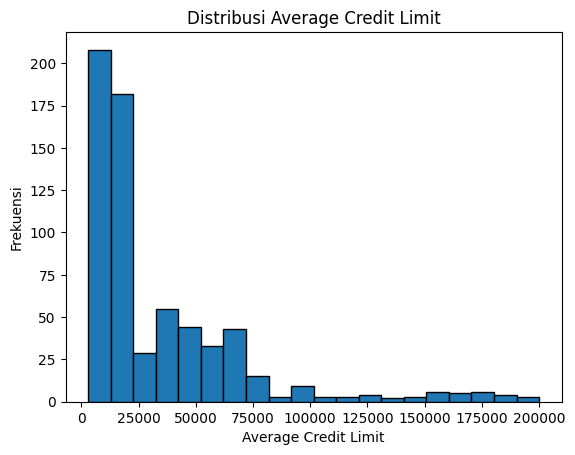

In [48]:
plt.hist(df['Avg_Credit_Limit'], bins=20, edgecolor='black')
plt.xlabel('Average Credit Limit')
plt.ylabel('Frekuensi')
plt.title('Distribusi Average Credit Limit')
plt.show()

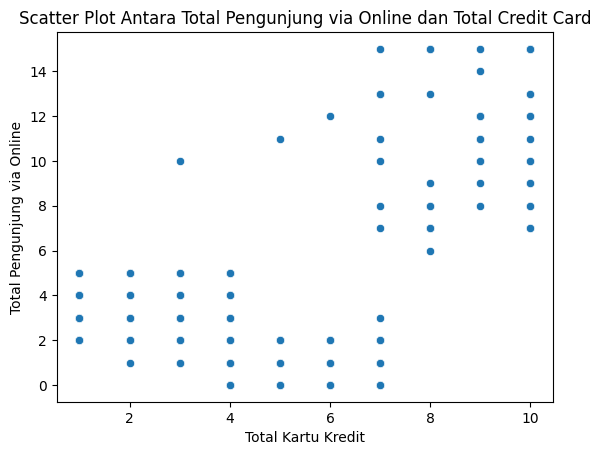

In [308]:
sns.scatterplot(x=df['Total_Credit_Cards'], y=df['Total_visits_online'])
plt.xlabel('Total Kartu Kredit')
plt.ylabel('Total Pengunjung via Online')
plt.title('Scatter Plot Antara Total Pengunjung via Online dan Total Credit Card')
plt.show()

Identifikasi Outlier

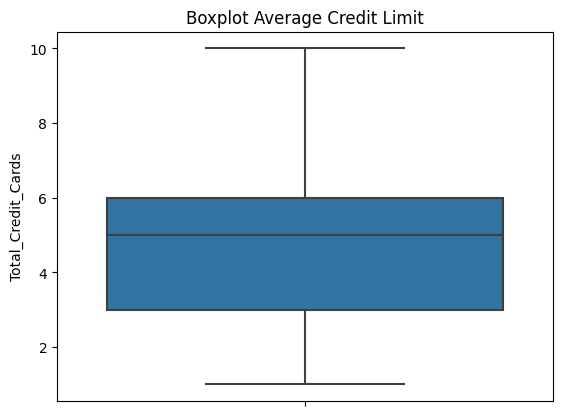

In [50]:
sns.boxplot(y=df['Total_Credit_Cards'])
plt.title('Boxplot Average Credit Limit')
plt.show()

In [51]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,100000,2,1,1,0,1
1,50000,3,0,10,9,1
2,50000,7,1,3,4,2
3,30000,5,1,1,4,2
4,100000,6,0,12,3,2


Heatmap dari matriks yang berkorelasi

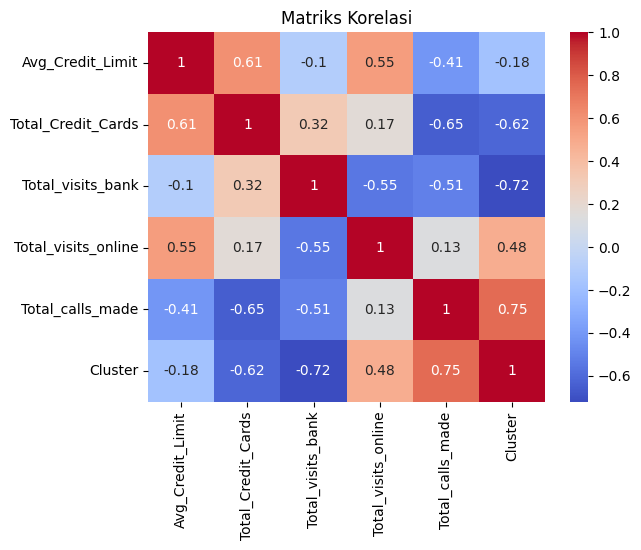

In [309]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

# Preprocessing

In [83]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [310]:
X_scaled = df[['Total_Credit_Cards','Total_visits_online']].values
#X_scaled = df[['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']].values

Normalisasi Data

In [311]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_scaled)

In [312]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)

# Modeling

Melihat persebaran titik dan menentukan jumlah cluster

In [313]:
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

Melihat jumlah cluster

Text(0, 0.5, 'Inertia')

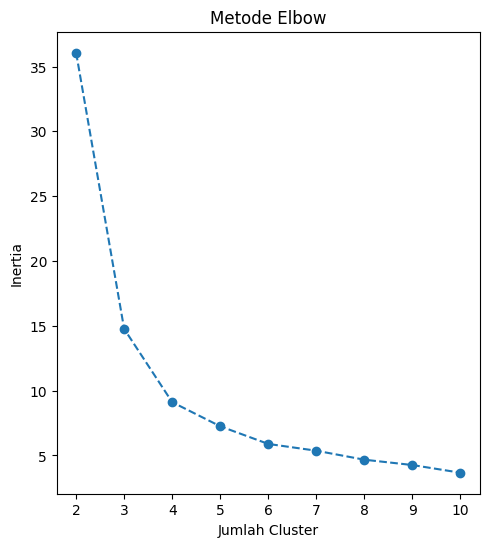

In [314]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')

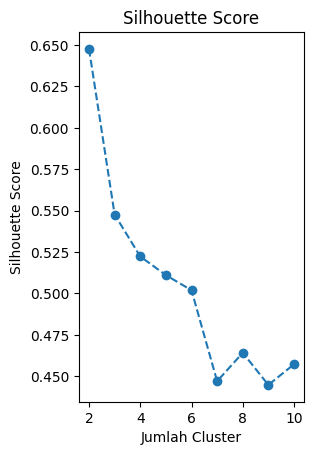

In [315]:
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()

In [372]:
kmeans = KMeans(n_clusters=3,  init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=0)

Menetapkan setiap titik data dalam X_scaled

In [373]:
y_cluster = kmeans.fit_predict(X_scaled)

Melihat label cluster

In [374]:
y_cluster

array([2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Menambahkan kolom baru 'Cluster' pada tabel

In [375]:
df['Cluster'] = kmeans.labels_

In [376]:
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,100000,2,1,1,0,2
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
...,...,...,...,...,...,...
655,99000,10,1,10,0,1
656,84000,10,1,13,2,1
657,145000,8,1,9,1,1
658,172000,10,1,15,0,1


Mengelompokkan data berdasarkan cluster dan menghitung rata-rata

In [377]:
df.groupby('Cluster').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster,,,,,
0,32946.969697,5.482323,3.419192,1.007576,2.103535
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12710.280374,2.327103,0.943925,3.626168,6.906542


Menentukan centroid

In [378]:
centroid = kmeans.cluster_centers_

In [379]:
centroid

array([[0.49803591, 0.06717172],
       [0.86      , 0.72666667],
       [0.14745587, 0.24174455]])

Melihat hubungan antara 2 kolom

Text(0, 0.5, 'Total pengunjung via online')

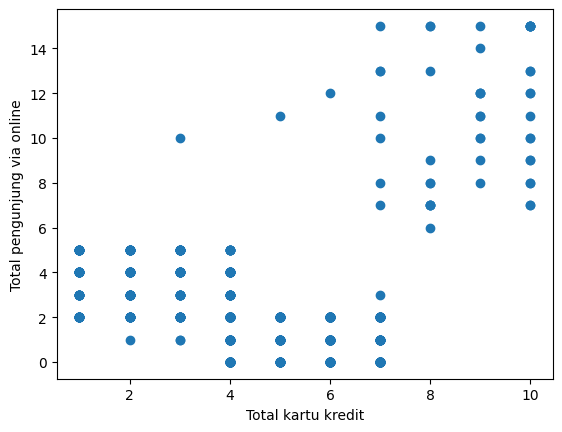

In [380]:
plt.scatter(df["Total_Credit_Cards"], df["Total_visits_online"])
plt.xlabel("Total kartu kredit")
plt.ylabel("Total pengunjung via online")

In [381]:
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,100000,2,1,1,0,2
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
...,...,...,...,...,...,...
655,99000,10,1,10,0,1
656,84000,10,1,13,2,1
657,145000,8,1,9,1,1
658,172000,10,1,15,0,1


C:\Users\skaha\AppData\Local\Temp\ipykernel_13360\1553930525.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroid[0,0],centroid[0,1],cmap='blue',marker='*',s=150, label='Centroid 0')
C:\Users\skaha\AppData\Local\Temp\ipykernel_13360\1553930525.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroid[1,0],centroid[1,1],cmap='orange',marker='*',s=150, label='Centroid 1')
C:\Users\skaha\AppData\Local\Temp\ipykernel_13360\1553930525.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroid[2,0],centroid[2,1],cmap='green',marker='*',s=150, label='Centroid 2')


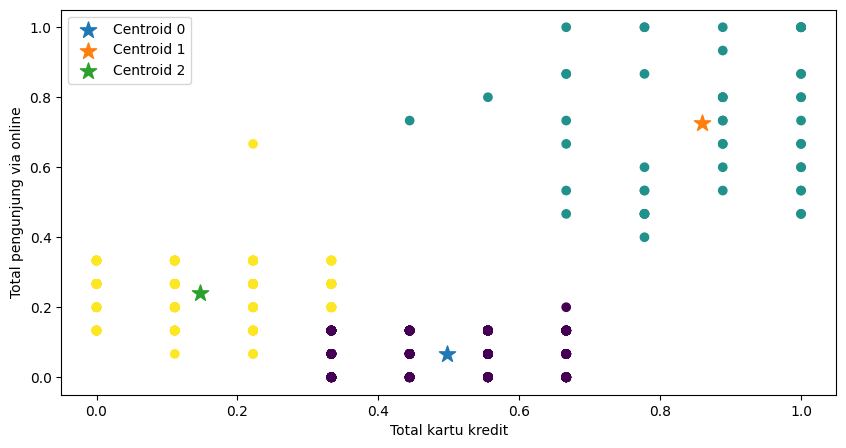

In [382]:
plt.figure(figsize = (10,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans.labels_)
plt.scatter(centroid[0,0],centroid[0,1],cmap='blue',marker='*',s=150, label='Centroid 0')
plt.scatter(centroid[1,0],centroid[1,1],cmap='orange',marker='*',s=150, label='Centroid 1')
plt.scatter(centroid[2,0],centroid[2,1],cmap='green',marker='*',s=150, label='Centroid 2')
plt.xlabel("Total kartu kredit")
plt.ylabel("Total pengunjung via online")
plt.legend()
plt.show()

# Evaluasi

In [383]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [384]:
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
(f"Silhouette Score: {silhouette_avg}")

'Silhouette Score: 0.5476259653247638'

In [385]:
db_index = davies_bouldin_score(X_scaled, kmeans.labels_)
(f"Davies-Bouldin Index: {db_index}")

'Davies-Bouldin Index: 0.5981388765330116'

In [386]:
ch_score = calinski_harabasz_score(X_scaled, kmeans.labels_)
(f"Calinski-Harabasz Index (CH Score): {ch_score}")

'Calinski-Harabasz Index (CH Score): 1084.1938497743795'